In [1]:
# importinng all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
df.shape

(1470, 35)

In [4]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [5]:
# creating a dataframe with only necessary features
features_to_keep = [
    'Age', 'Gender', 'MaritalStatus',
    'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
    'JobInvolvement', 'WorkLifeBalance', 'MonthlyIncome', 'JobLevel',
    'Education', 'EducationField', 'Department', 'JobRole', 'BusinessTravel',
    'OverTime', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked','Attrition'
]

In [7]:
df_selected = df[features_to_keep].copy()

In [8]:
df_selected.head()

,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,JobInvolvement,WorkLifeBalance,MonthlyIncome,JobLevel,...,JobRole,BusinessTravel,OverTime,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Attrition
0,41,Female,Single,4,2,1,3,1,5993,2,...,Sales Executive,Travel_Rarely,Yes,6,4,0,5,8,8,Yes
1,49,Male,Married,2,3,4,2,3,5130,2,...,Research Scientist,Travel_Frequently,No,10,7,1,7,10,1,No
2,37,Male,Single,3,4,2,2,3,2090,1,...,Laboratory Technician,Travel_Rarely,Yes,0,0,0,0,7,6,Yes
3,33,Female,Married,3,4,3,3,3,2909,1,...,Research Scientist,Travel_Frequently,Yes,8,7,3,0,8,1,No
4,27,Male,Married,2,1,4,3,3,3468,1,...,Laboratory Technician,Travel_Rarely,No,2,2,2,2,6,9,No


In [10]:
df_selected.shape

(1470, 23)

In [11]:
# Map Attrition to 1/0
df_selected['Attrition'] = df_selected['Attrition'].map({'Yes': 1, 'No': 0})

In [12]:
df_selected.head()

,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,JobInvolvement,WorkLifeBalance,MonthlyIncome,JobLevel,...,JobRole,BusinessTravel,OverTime,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Attrition
0,41,Female,Single,4,2,1,3,1,5993,2,...,Sales Executive,Travel_Rarely,Yes,6,4,0,5,8,8,1
1,49,Male,Married,2,3,4,2,3,5130,2,...,Research Scientist,Travel_Frequently,No,10,7,1,7,10,1,0
2,37,Male,Single,3,4,2,2,3,2090,1,...,Laboratory Technician,Travel_Rarely,Yes,0,0,0,0,7,6,1
3,33,Female,Married,3,4,3,3,3,2909,1,...,Research Scientist,Travel_Frequently,Yes,8,7,3,0,8,1,0
4,27,Male,Married,2,1,4,3,3,3468,1,...,Laboratory Technician,Travel_Rarely,No,2,2,2,2,6,9,0


### Visualization to get some insights of data

In [13]:
df_selected.head(5)

,Age,Gender,MaritalStatus,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,JobInvolvement,WorkLifeBalance,MonthlyIncome,JobLevel,...,JobRole,BusinessTravel,OverTime,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Attrition
0,41,Female,Single,4,2,1,3,1,5993,2,...,Sales Executive,Travel_Rarely,Yes,6,4,0,5,8,8,1
1,49,Male,Married,2,3,4,2,3,5130,2,...,Research Scientist,Travel_Frequently,No,10,7,1,7,10,1,0
2,37,Male,Single,3,4,2,2,3,2090,1,...,Laboratory Technician,Travel_Rarely,Yes,0,0,0,0,7,6,1
3,33,Female,Married,3,4,3,3,3,2909,1,...,Research Scientist,Travel_Frequently,Yes,8,7,3,0,8,1,0
4,27,Male,Married,2,1,4,3,3,3468,1,...,Laboratory Technician,Travel_Rarely,No,2,2,2,2,6,9,0


In [15]:
df_selected.columns

Index(['Age', 'Gender', 'MaritalStatus', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobInvolvement',
       'WorkLifeBalance', 'MonthlyIncome', 'JobLevel', 'Education',
       'EducationField', 'Department', 'JobRole', 'BusinessTravel', 'OverTime',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked',
       'Attrition'],
      dtype='object')

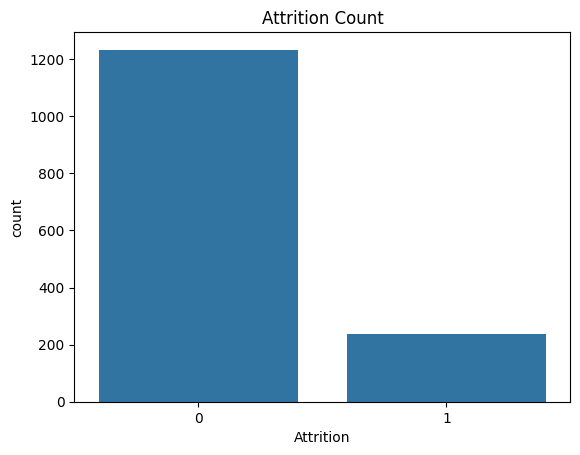

In [16]:
# Attrition Count --> indicating how many people left and how may are still there due to certain factors
sns.countplot(x='Attrition', data=df_selected)
plt.title('Attrition Count')
plt.show()

Conclusion -> most of people are not leaving means attrition rate is low

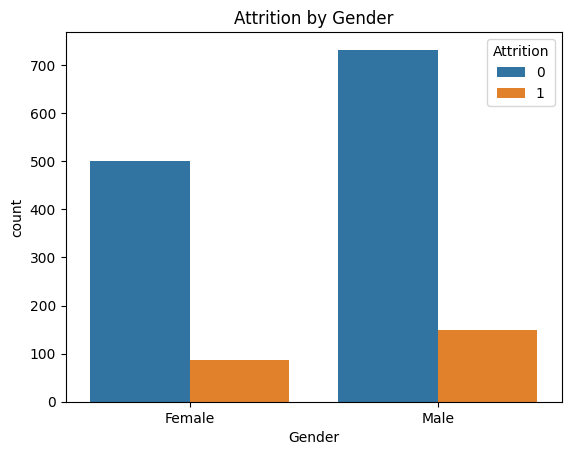

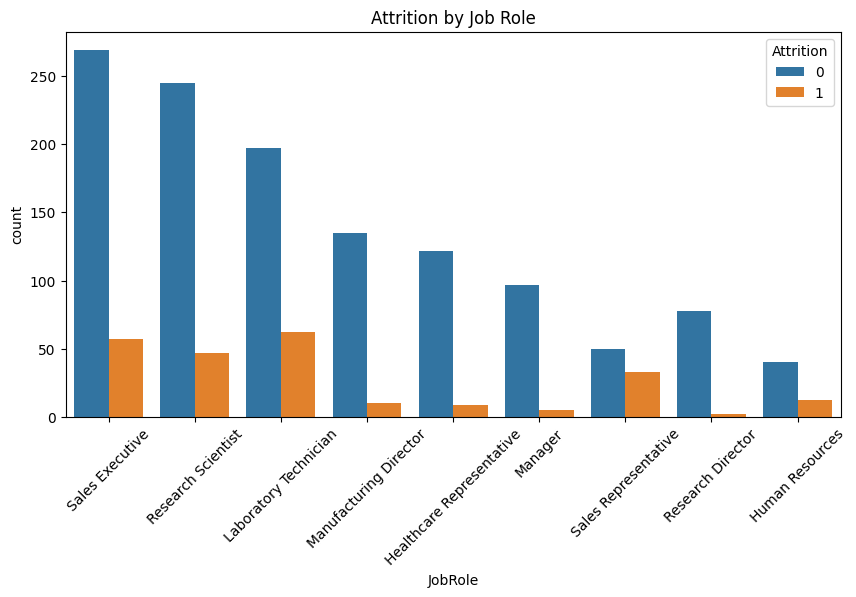

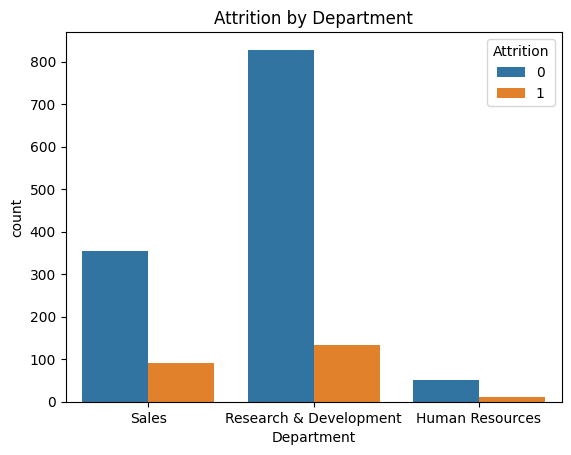

In [17]:
# Attrition based on Gender , Job Role , Department

# Gender
sns.countplot(data=df_selected, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()

# Job Role
plt.figure(figsize=(10,5))
sns.countplot(data=df_selected, x='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

# Department
sns.countplot(data=df_selected, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()


Conclusions :

**Gender** --> Most of male are taking attrition as there number is high as compared to females

**Job Role** --> Employee working in Sales Executive ,Research , Laboratory Technician are most likely job roles to take attrition

**Department** --> Research and development department got more attrition as more number od employee work in that department


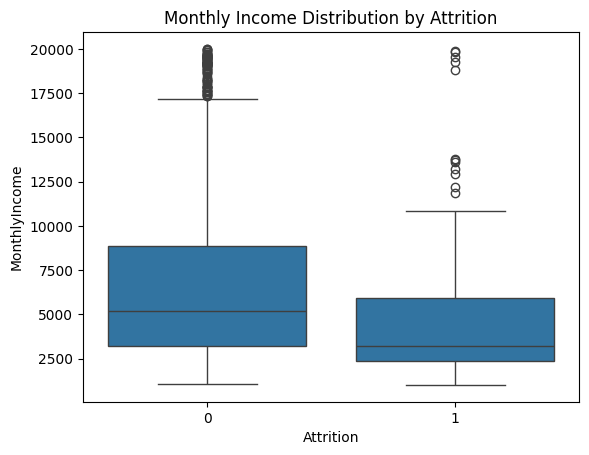

In [18]:
# Monthly Income VS Attrition
sns.boxplot(data=df_selected, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income Distribution by Attrition')
plt.show()

Conclusion:

In income range of 2500 - 10000  and at higher range --> people take attrition.
So either people with too low or too high income are taking attrition

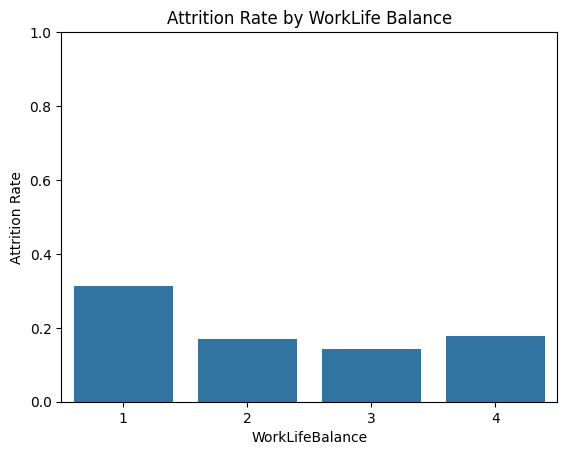

In [20]:
# Calculate attrition rate by WorkLifeBalance
wlb_attrition_rate = df_selected.groupby('WorkLifeBalance')['Attrition'].mean().reset_index()

# Plot as barplot
sns.barplot(data=wlb_attrition_rate, x='WorkLifeBalance', y='Attrition')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by WorkLife Balance')
plt.ylim(0, 1)
plt.show()

Conclusion --> People with low worklifebalance (ie. with rating of 1) take attrition

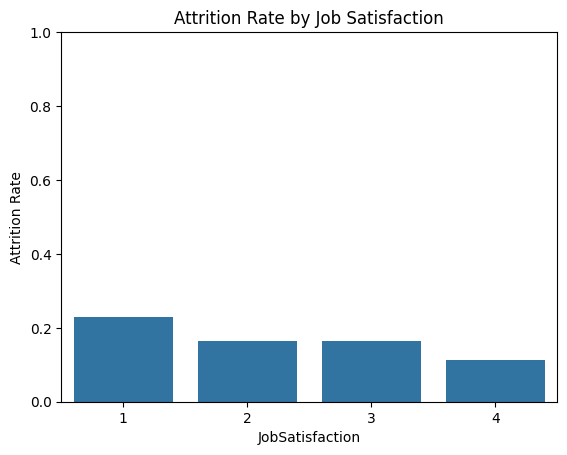

In [21]:
# atrrition based on jobsatisfication
js_attrition_rate = df_selected.groupby('JobSatisfaction')['Attrition'].mean().reset_index()
sns.barplot(data=js_attrition_rate, x='JobSatisfaction', y='Attrition')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Satisfaction')
plt.ylim(0, 1)
plt.show()

Conclusion --> Its clear that people with low job satisfication mostly take attrition

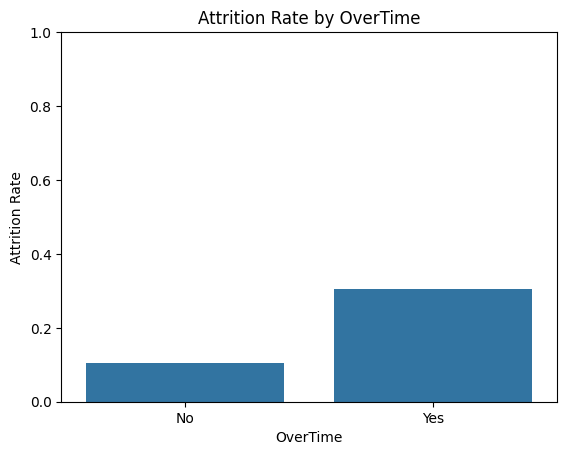

In [22]:
# Overtime vs Attrition
ot_attrition_rate = df_selected.groupby('OverTime')['Attrition'].mean().reset_index()

sns.barplot(data=ot_attrition_rate, x='OverTime', y='Attrition')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by OverTime')
plt.ylim(0, 1)
plt.show()


Conclution -->

High attrition for OverTime = Yes

Low attrition for OverTime = No

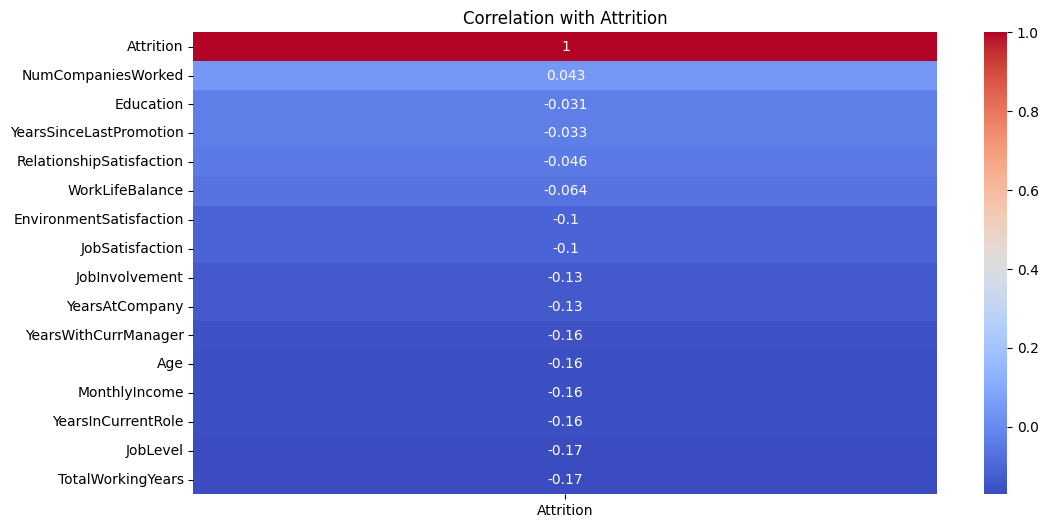

In [23]:
# Correlation with Attrition
# Select numeric cols
numeric_df = df_selected.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr()[['Attrition']].sort_values('Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Attrition")
plt.show()


In [24]:
# Split into X and y
# x --> features , y --> target
X = df_selected.drop('Attrition', axis=1)
y = df_selected['Attrition']

In [25]:
# Identity the column type so that we can encode the categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

In [26]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

In [27]:
# Train/Test Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


✅ Why We Use a Pipeline (with ColumnTransformer):

Different preprocessing for different features
You have numerical features (e.g., Age, MonthlyIncome) → need scaling

You have categorical features (e.g., Gender, JobRole) → need encoding

Without a pipeline, you’d have to:

Manually encode categorical columns

Scale only numeric ones

Recombine them

Be careful about column order, consistency, leakage...

→ That's messy and error-prone.

# XgBoost

Boosting --> Most powerfull Ensemble learning
Here , it learns from previous mistakes at each stage it notes its mistake and passes to the next stage ie. next iteration so like wise it improves its performance.

XgBoost --> here we use same concept with decision tree.

In [28]:
# Modeling
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Build full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Fit model
model_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'JobSatisfaction',
                                                   'EnvironmentSatisfaction',
                                                   'RelationshipSatisfaction',
                                                   'JobInvolvement',
                                                   'WorkLifeBalance',
                                                   'MonthlyIncome', 'JobLevel',
                                                   'Education',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'TotalWorkingYears',
                                                   'Nu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [29]:
# Evaluate the Model
y_pred = model_pipeline.predict(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.54      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.64       294
weighted avg       0.82      0.85      0.83       294

Confusion Matrix:
 [[236  11]
 [ 34  13]]


HAP = SHapley Additive exPlanations

It's a method based on game theory that:

Tells you how much each feature contributed to a prediction.

✅ It works with tree-based models like XGBoost

✅ Gives global (overall) + local (per-row) explanations

✅ Creates beautiful visualizations

In [30]:
#  Import SHAP and prepare explainer
import shap

# Extract trained XGBoost model from pipeline
xgb_model = model_pipeline.named_steps['classifier']

# Get transformed test data
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_test_transformed)


In [31]:
# Get SHAP values
shap_values = explainer(X_test_transformed)

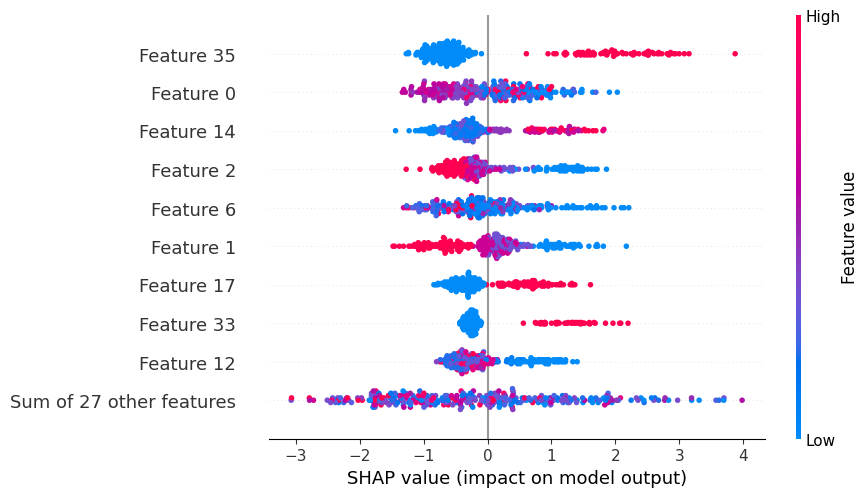

In [32]:
# Global feature importance summary plot
shap.plots.beeswarm(shap_values)

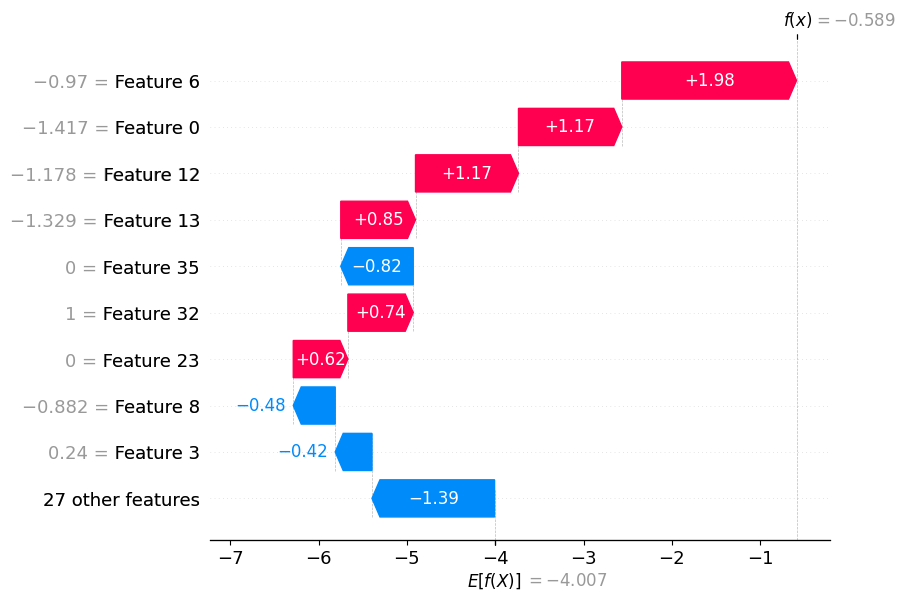

In [34]:
# Explain a single prediction (e.g., 0th person in test set)
shap.plots.waterfall(shap_values[0])